### O dataset a seguir faz a análise dos dados extraidos em uma planilha do google de um determinado dataset no big query.

### Usando a biblioteca gspread e files(google colab) para a integração com o Google Sheets para acessar os dados da planilha salva no google drive.

### O Objetivo da análise é obter métricas para as ocorrências de roubos de carro

### Foi feita a exploração, pré-processamento, limpeza e visualização dos dados para melhor abstração dos insights.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import gspread
from google.colab import files

In [2]:
# Fazendo upload de arquivo JSON das credenciais
uploaded = files.upload()

Saving arquivo.json to arquivo.json


In [3]:
# Obtendo o nome do arquivo JSON carregado
json_filename = list(uploaded.keys())[0]

In [4]:
# Autenticando usando o arquivo de credenciais JSON
gc = gspread.service_account(filename=json_filename)

In [5]:
# Indicando a URL
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1aHj4NAQa5WDwAhrHDk4-6eoHvG4YSeZS4yO6lHQ_Z3g/edit?gid=1292990128#gid=1292990128"

# Abrir planilha do Google Sheets
spreadsheet = gc.open_by_url(spreadsheet_url)

# Selecionar a aba da planilha
worksheet = spreadsheet.worksheet("crime")

In [6]:
# Lendo os dados da planilha
data = worksheet.get_all_records()

In [7]:
# Convertendo os dados para um Data Frame do Pandas
df = pd.DataFrame(data)

In [31]:
# Verificando os primeiros registos
df.head(n=5)

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20145022722,"UNKNOWN Austin, TX",,03/07/2014 12:00:00,Not cleared,,AGG ROBBERY/DEADLY WEAPON,UK,,,,UNKNOWN,Robbery,21/05/2014 12:00:00,,,2014,
1,20141520729,"8101 N IH 35 SVRD SB Austin, TX",,16/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,8101 N IH 35 SVRD SB,Burglary / \nBreaking & Entering,01/06/2014 12:00:00,,,2014,
2,20142381180,"2725 LYLE ROAD Austin, TX",,11/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,H,,,,2725 LYLE ROAD,Burglary / \nBreaking & Entering,26/08/2014 12:00:00,,,2014,
3,20143490318,"3220 HARMON AVE Austin, TX",,14/01/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,3220 HARMON AVE,Burglary / \nBreaking & Entering,15/12/2014 12:00:00,,,2014,
4,20143630961,"9632 ALICE MAE LN Austin, TX",,20/02/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,F,,,,9632 ALICE MAE LN,Burglary / \nBreaking & Entering,29/12/2014 12:00:00,,,2014,


In [32]:
# Exemplo de análise: Descrição estatística dos dados numéricos
df.describe()

,unique_key,year
count,2.454400e+04,24544.000000
mean,1.834391e+10,2014.972580
std,1.889021e+10,0.814812
min,2.014200e+04,2014.000000
25%,2.014501e+10,2014.000000
50%,2.015317e+10,2015.000000
75%,2.016179e+10,2016.000000
max,2.014142e+12,2016.000000


In [10]:
# Estrutura do Data frame
df.shape

(25000, 18)

In [36]:
# Variavel resposta recebe a estrutura do DF
df[df['primary_type'] == 0].shape

(0, 18)

In [142]:
# Schema
df.head(n=10)

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20145022722,"UNKNOWN Austin, TX",,03/07/2014 12:00:00,Not cleared,,AGG ROBBERY/DEADLY WEAPON,UK,,,,UNKNOWN,Robbery,21/05/2014 12:00:00,,,2014,
1,20141520729,"8101 N IH 35 SVRD SB Austin, TX",,16/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,8101 N IH 35 SVRD SB,Burglary / \nBreaking & Entering,01/06/2014 12:00:00,,,2014,
2,20142381180,"2725 LYLE ROAD Austin, TX",,11/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,H,,,,2725 LYLE ROAD,Burglary / \nBreaking & Entering,26/08/2014 12:00:00,,,2014,
3,20143490318,"3220 HARMON AVE Austin, TX",,14/01/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,3220 HARMON AVE,Burglary / \nBreaking & Entering,15/12/2014 12:00:00,,,2014,
4,20143630961,"9632 ALICE MAE LN Austin, TX",,20/02/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,F,,,,9632 ALICE MAE LN,Burglary / \nBreaking & Entering,29/12/2014 12:00:00,,,2014,
5,20145027962,"LAKE AUSTIN Austin, TX",,,,,BURGLARY OF RESIDENCE,UK,,,,LAKE AUSTIN,Burglary / \nBreaking & Entering,21/06/2014 12:00:00,,,2014,
6,20143380899,"6633 E US 290 SVRD EB Austin, TX",,22/12/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,6633 E US 290 SVRD EB,Burglary / \nBreaking & Entering,04/12/2014 12:00:00,,,2014,
7,2014781810,"700 BLOCK US HWY 183 Austin, TX",,24/03/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,700 BLOCK US HWY 183,Auto Theft,19/03/2014 12:00:00,,,2014,
8,2014990420,"1748 HOLEN RD Austin, TX",,11/04/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,1748 HOLEN RD,Auto Theft,09/04/2014 12:00:00,,,2014,
9,2014350754,"9530 E US 290 HWY SVRD EB Austin, TX",,07/02/2014 12:00:00,Not cleared,,AUTO THEFT,E,,,,9530 E US 290 HWY SVRD EB,Auto Theft,04/02/2014 12:00:00,,,2014,


In [38]:
# Colunas e seus tipos de dados
df.dtypes

unique_key                int64
address                  object
census_tract             object
clearance_date           object
clearance_status         object
council_district_code    object
description              object
district                 object
latitude                 object
longitude                object
location                 object
location_description     object
primary_type             object
timestamp                object
x_coordinate             object
y_coordinate             object
year                      int64
zipcode                  object
dtype: object

In [39]:
# Verificando os atributos categóricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
address,24544,10487,"1000 E 41ST ST Austin, TX 78751",440
census_tract,24544,32,11,5530
clearance_date,24544,1101,,881
clearance_status,24544,4,Not cleared,20538
council_district_code,24544,7,9,15352
description,24544,39,THEFT,7901
district,24544,12,B,8896
latitude,24544,3402,,17340
longitude,24544,3384,,17340
location,24544,3491,,17340


In [40]:
# Verificando atributos numéricos - Removendo a variável numérica 'unique key'
df.drop('unique_key', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,24544.0,2014.97258,0.814812,2014.0,2014.0,2015.0,2016.0,2016.0


In [16]:
# Verificando dados faltantes
df.head(n=30)

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
0,20145022722,"UNKNOWN Austin, TX",,03/07/2014 12:00:00,Not cleared,,AGG ROBBERY/DEADLY WEAPON,UK,,,,UNKNOWN,Robbery,21/05/2014 12:00:00,,,2014,
1,20141520729,"8101 N IH 35 SVRD SB Austin, TX",,16/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,8101 N IH 35 SVRD SB,Burglary / \nBreaking & Entering,01/06/2014 12:00:00,,,2014,
2,20142381180,"2725 LYLE ROAD Austin, TX",,11/09/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,H,,,,2725 LYLE ROAD,Burglary / \nBreaking & Entering,26/08/2014 12:00:00,,,2014,
3,20143490318,"3220 HARMON AVE Austin, TX",,14/01/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,3220 HARMON AVE,Burglary / \nBreaking & Entering,15/12/2014 12:00:00,,,2014,
4,20143630961,"9632 ALICE MAE LN Austin, TX",,20/02/2015 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,F,,,,9632 ALICE MAE LN,Burglary / \nBreaking & Entering,29/12/2014 12:00:00,,,2014,
5,20145027962,"LAKE AUSTIN Austin, TX",,,,,BURGLARY OF RESIDENCE,UK,,,,LAKE AUSTIN,Burglary / \nBreaking & Entering,21/06/2014 12:00:00,,,2014,
6,20143380899,"6633 E US 290 SVRD EB Austin, TX",,22/12/2014 12:00:00,Not cleared,,BURGLARY NON RESIDENCE,UK,,,,6633 E US 290 SVRD EB,Burglary / \nBreaking & Entering,04/12/2014 12:00:00,,,2014,
7,2014781810,"700 BLOCK US HWY 183 Austin, TX",,24/03/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,700 BLOCK US HWY 183,Auto Theft,19/03/2014 12:00:00,,,2014,
8,2014990420,"1748 HOLEN RD Austin, TX",,11/04/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,1748 HOLEN RD,Auto Theft,09/04/2014 12:00:00,,,2014,
9,2014350754,"9530 E US 290 HWY SVRD EB Austin, TX",,07/02/2014 12:00:00,Not cleared,,AUTO THEFT,E,,,,9530 E US 290 HWY SVRD EB,Auto Theft,04/02/2014 12:00:00,,,2014,


In [42]:
# Verificando colunas com dados faltantes
df.isna().any()

unique_key               False
address                  False
census_tract             False
clearance_date           False
clearance_status         False
council_district_code    False
description              False
district                 False
latitude                 False
longitude                False
location                 False
location_description     False
primary_type             False
timestamp                False
x_coordinate             False
y_coordinate             False
year                     False
zipcode                  False
dtype: bool

In [43]:
# Exibe a quantidade de dados faltantes por coluna
df.isna().sum()

unique_key               0
address                  0
census_tract             0
clearance_date           0
clearance_status         0
council_district_code    0
description              0
district                 0
latitude                 0
longitude                0
location                 0
location_description     0
primary_type             0
timestamp                0
x_coordinate             0
y_coordinate             0
year                     0
zipcode                  0
dtype: int64

In [44]:
# Função que levanta algumas estatísticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(df: pd.DataFrame) -> None:
  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _= df[df[col].isna()].shape
      total, _= df.shape
      dict_dados_faltantes = {col: {'qtd': qtd, 'porcentagem': round(100 * qtd / total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)
  for stat in stats_dados_faltantes:
    print(stat)

In [141]:
# Chamando a função para dados faltantes
stats_dados_faltantes(df=df)

In [82]:
# Filtrando os dados de roubo de carros
roubo_carros = (df[df['primary_type'] == 'Auto Theft'])

In [56]:
# Verificando o Data Frame filtrado = roubo de carros
roubo_carros

,unique_key,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,longitude,location,location_description,primary_type,timestamp,x_coordinate,y_coordinate,year,zipcode
7,2014781810,"700 BLOCK US HWY 183 Austin, TX",,24/03/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,700 BLOCK US HWY 183,Auto Theft,19/03/2014 12:00:00,,,2014,
8,2014990420,"1748 HOLEN RD Austin, TX",,11/04/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,1748 HOLEN RD,Auto Theft,09/04/2014 12:00:00,,,2014,
9,2014350754,"9530 E US 290 HWY SVRD EB Austin, TX",,07/02/2014 12:00:00,Not cleared,,AUTO THEFT,E,,,,9530 E US 290 HWY SVRD EB,Auto Theft,04/02/2014 12:00:00,,,2014,
10,20141111228,"FRANCIA LN/W SLAUGHTER LN Austin, TX",,23/04/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,FRANCIA LN/W SLAUGHTER LN,Auto Theft,21/04/2014 12:00:00,,,2014,
11,20141070567,"7795 TAUPON DR Austin, TX",,18/04/2014 12:00:00,Not cleared,,AUTO THEFT,UK,,,,7795 TAUPON DR,Auto Theft,17/04/2014 12:00:00,,,2014,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24945,2016801258,"3702 S 2ND ST Austin, TX 78704",1307,21/03/2016 12:00:00,Not cleared,3,AUTO THEFT,D,,,,3702 S 2ND ST,Auto Theft,20/03/2016 12:00:00,3105871,10056888,2016,78704
24950,20152761167,"3616 S 2ND ST Austin, TX 78704",1307,07/10/2015 12:00:00,Not cleared,3,AUTO THEFT,D,,,,3616 S 2ND ST,Auto Theft,03/10/2015 12:00:00,3106012,10057055,2015,78704
24954,2014730911,"3508 S 1ST ST Austin, TX 78704 (30.230816, -97...",1307,31/03/2014 12:00:00,Cleared by Arrest,3,AUTO THEFT,D,30230816,-97766744,"(30.230816,-97.766744)",3508 S 1ST ST,Auto Theft,14/03/2014 12:00:00,3106980,10057096,2014,78704
24972,20145056988,"909 AUDREY DR Austin, TX 78704 (30.232301, -97...",1307,30/12/2014 12:00:00,Not cleared,3,AUTO THEFT,D,30232301,-97771222,"(30.232301,-97.771222)",909 AUDREY DR,Auto Theft,28/12/2014 12:00:00,3105560,10057506,2014,78704


In [123]:
# Filtrando apenas a coluna 'primary type' e district para verificar os locais de maior incidencia
qtd_roubo_carros_por_distrito = roubo_carros[['primary_type','district']].value_counts()

In [135]:
# Exibindo os dados filtrados de roubos de carro pelo tipo e distrito (região)
qtd_roubo_carros_por_distrito

primary_type  district
Auto Theft    B           414
              G           253
              C           213
              D           148
              I            42
              UK           25
              E             5
              H             3
              A             1
              F             1
Name: count, dtype: int64

In [126]:
# Filtrando os distritos
roubo_carros_em_distritos = roubo_carros['district'].unique()

In [127]:
# Exibindo os distritos/regiões distinto(a)s que possuem roubos de carros
roubo_carros_em_distritos

array(['UK', 'E', 'H', 'I', 'D', 'F', 'C', 'B', 'A', 'G'], dtype=object)

In [83]:
# Removendo dados faltantes no Data Frame para maior solidez nos dados trabalhados posteriormente
df.dropna(inplace = True)

In [128]:
# Contagem das ocorrencias de cada delito na tabela. A analise foca no roubo de carros, em inglês 'Auto Theft'.
contagem_ocorrencias = df['primary_type'].value_counts().reset_index()
contagem_ocorrencias

,primary_type,count
0,Theft,12608
1,Theft: All Other Larceny,3740
2,Theft: BOV,2080
3,Burglary,1537
4,Auto Theft,1105
5,Burglary / \nBreaking & Entering,986
6,Agg Assault,709
7,Robbery,621
8,Theft: Shoplifting,495
9,Aggravated Assault,314


In [92]:
# Importando as bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **A figura a seguir mostra a relação da quantidade de roubo de carros em comparação a outras ocorrências.**



<ipython-input-116-cf51862748ab>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  eixo.set_xticklabels(eixo.get_xticklabels(), rotation=90)


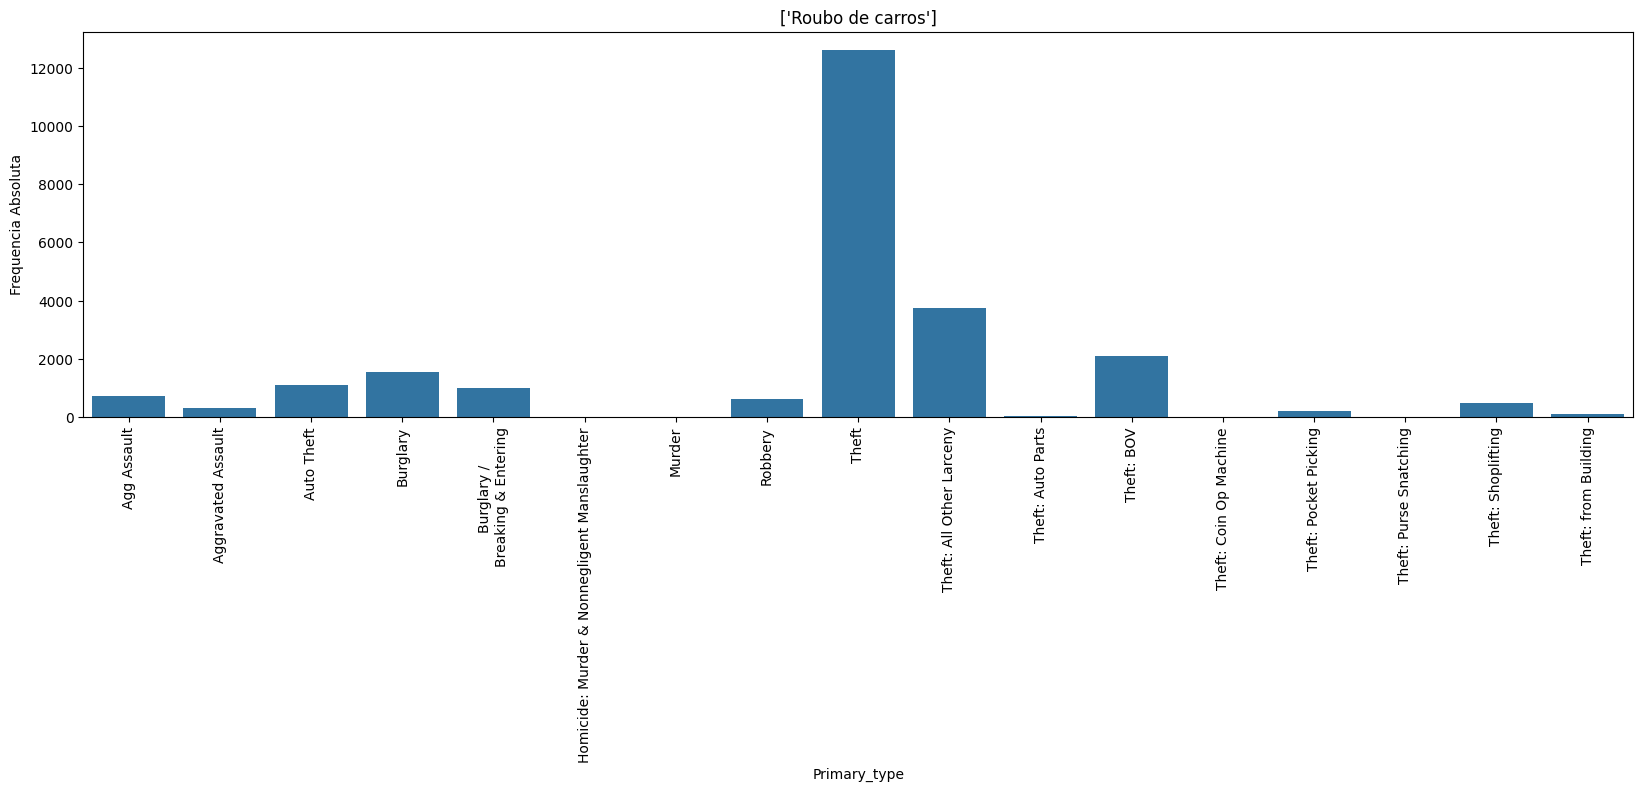

In [116]:
# Definindo as variáveis
coluna = 'primary_type'
titulo = ['Roubo de carros']

# Criando as variáveis para armazenar a figura e os eixos da figura
figura, eixo = plt.subplots(figsize=(20,5))

# Gerando o DataFrame para criar o gráfico
df_to_plot = df[coluna].value_counts().to_frame(name='frequencia_absoluta')
df_to_plot[coluna] = df_to_plot.index
df_to_plot.reset_index(drop=True, inplace=True)
df_to_plot.sort_values(by=[coluna], inplace=True)

# Seaborn configura o plot
sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixo)
eixo.set(title=titulo, xlabel=coluna.capitalize(), ylabel='Frequencia Absoluta')
eixo.set_xticklabels(eixo.get_xticklabels(), rotation=90)

# Exibe a figura
plt.show()

# **A figura a seguir mostra a quantidade de roubo de carros em cada distrito**

In [136]:
# Exibindo quantidade de ocorrencias por distrito para verificação do gráfico abaixo
qtd_roubo_carros_por_distrito

primary_type  district
Auto Theft    B           414
              G           253
              C           213
              D           148
              I            42
              UK           25
              E             5
              H             3
              A             1
              F             1
Name: count, dtype: int64

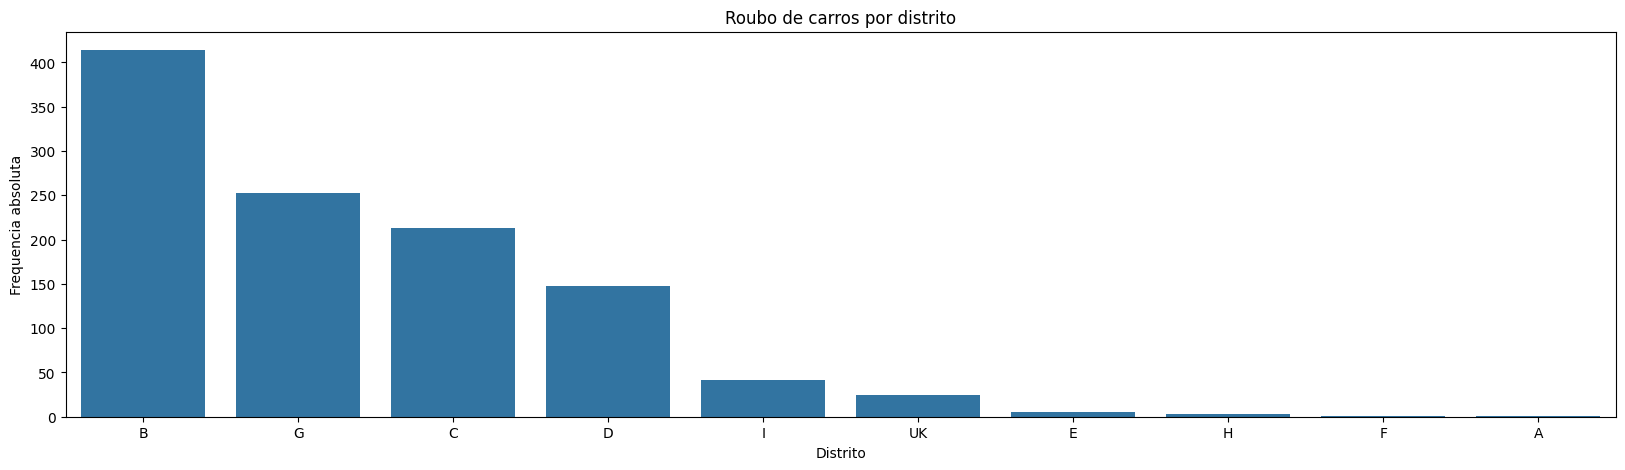

In [134]:
# Filtrando ocorrencias de roubo de carros
df_roubo_carros = df[df['primary_type'] == 'Auto Theft']

# Agrupando por distrito e contando a frequencia das ocorrencias
df_roubo_carros_distrito = df_roubo_carros['district'].value_counts().reset_index()
df_roubo_carros_distrito.columns = ['district', 'frequencia absoluta']

# Plotando as ocorrencias de roubo de carros por distrito
plt.figure(figsize=(20,5))
sns.barplot(x='district', y='frequencia absoluta', data=df_roubo_carros_distrito)
plt.title('Roubo de carros por distrito')
plt.xlabel('Distrito')
plt.ylabel('Frequencia absoluta')

# Exibindo o gráfico
plt.show()